# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

### Part 1: Analyzing Best-Seller Trends Across Product Categories

#### Crosstab Analysis:

In [2]:
import pandas as pd

In [3]:
url = r"C:\Users\biave\Documents\IronHack\Labs\Week13\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [15]:
# Create a crosstab between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

# Calculate the proportion and add a column
crosstab_result['%BestSeller'] = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False]) * 100
crosstab_result

#Sort the categories based on this proportion
crosstab_sorted = crosstab_result.sort_values(by='%BestSeller', ascending=False)
crosstab_sorted

isBestSeller,False,True,%BestSeller
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
...,...,...,...
Bedding Collections,6309,0,0.000000
CPUs,249,0,0.000000
"CD, Disc & Tape Players",8798,0,0.000000


In [ ]:
# As we can being a best-seller in more prevalent in categories like Grocery, Smart Home Security & Lighting and Health & Personal Care.
# Unlike in the following categories: CD, Disc & Tape Players; Blank Media Cases & Wallets and eBook Readers & Accessories which don't have any best-sellers.

#### Statistical Tests:

In [22]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['category'], df['isBestSeller'])

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
print(f'Chi-Square Statistic: {chi2_statistic}') 
print(f'P-Value: {chi2_p_value}')

if chi2_p_value < 0.05:
    print('This suggests that there is a significant association between the two variables.')
else:
    print('This suggests that there is not enough evidence to conclude a significant association between the variables.')

Chi-Square Statistic: 36540.20270061387
P-Value: 0.0
This suggests that there is a significant association between the two variables.


In [24]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association

cramers_v = association(crosstab, method="cramer")
print(f"Cramér's V: {cramers_v}")

if cramers_v >= 0.1:
    print('This suggests that there is a weak association between the two variables.')
elif cramers_v >= 0.3:
    print('This suggests that there is a moderate association between the two variables.')
else:
    print('This suggests that there is a strong association between the two variables.')

Cramér's V: 0.1222829439760564
This suggests that there is a weak association between the two variables.


#### Visualizations:

In [25]:
import matplotlib.pyplot as plt

In [36]:
top_10_categories = crosstab_sorted.head(10)
top_10_categories

isBestSeller,False,True,%BestSeller
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
"Billiard, Snooker & Pool",241,8,3.212851
Pet Supplies,9152,285,3.020028
Home Brewing & Wine Making,239,7,2.845528
Mirrors,243,7,2.800000


In [38]:
top_10_categories = top_10_categories.drop(columns='%BestSeller')

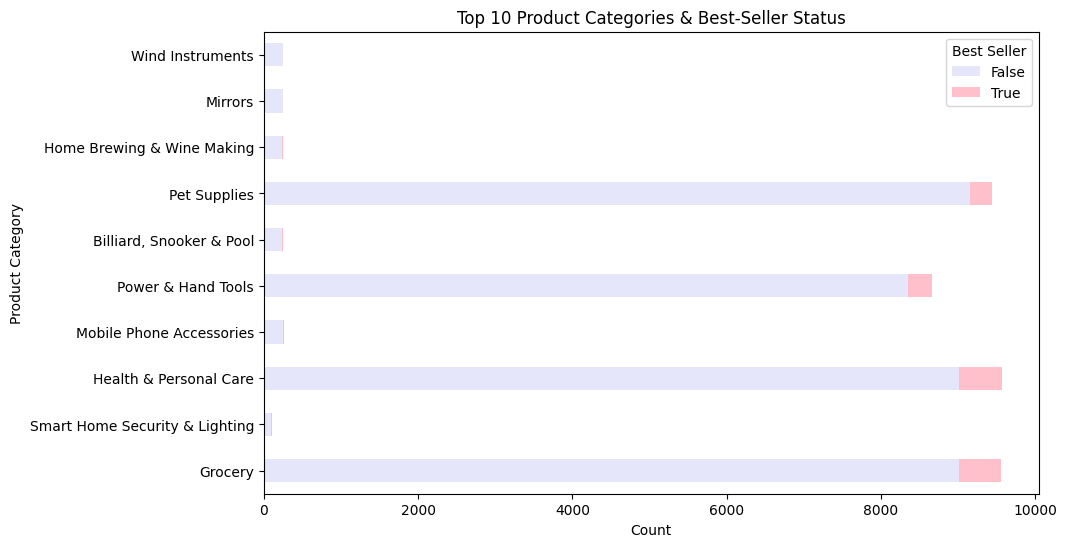

In [54]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
top_10_categories.plot(kind='barh', stacked=True, figsize=(10, 6), color=['lavender', 'pink'])
plt.title("Top 10 Product Categories & Best-Seller Status")
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.legend(title="Best Seller", labels=["False", "True"])
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [58]:
# Preliminary Step: Remove outliers in product prices.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Take the outliers out of our df
df_clean = df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

#### Violin Plots:

In [60]:
import seaborn as sns

C:\Users\biave\AppData\Local\Temp\ipykernel_13644\4143336436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, y='category', x='price', inner='quartile', palette="pastel")


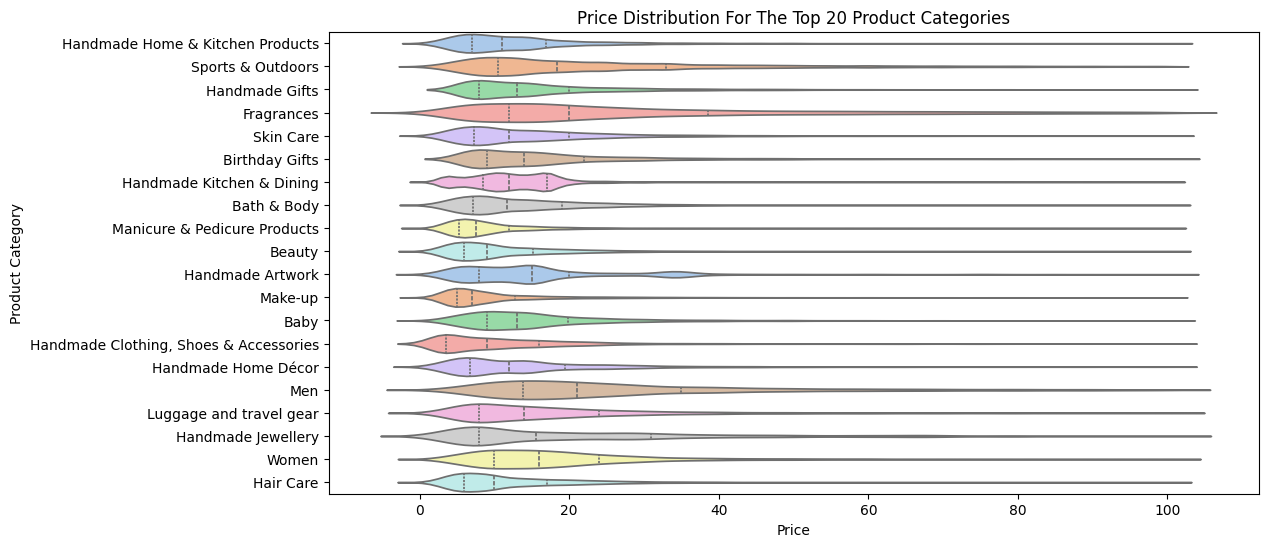

In [68]:
top_categories = df_clean['category'].value_counts().head(20).index
df_filtered = df_clean[df_clean['category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtered, y='category', x='price', inner='quartile', palette="pastel")
plt.title("Price Distribution For The Top 20 Product Categories")
plt.xlabel("Price")
plt.ylabel("Product Category")
plt.show()

In [103]:
# Calculate the product category that tends to have the highest median price
median_price = df.groupby('category')['price'].median().sort_values(ascending=False)
median_price

category
Laptops                      1042.725
Desktop PCs                   810.400
Snowboards                    366.725
Home Audio Record Players     326.080
3D Printers                   319.000
                               ...   
Adapters                        7.050
Make-up                         7.000
Signs & Plaques                 6.990
Arts & Crafts                   5.990
Office Paper Products           4.380
Name: price, Length: 296, dtype: float64

#### Bar Charts:

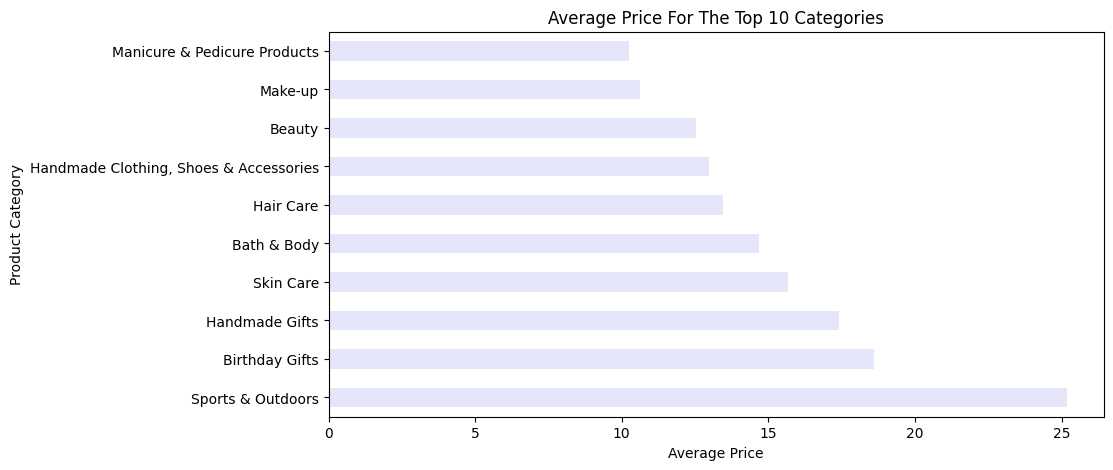

In [112]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top_10_categories = df_clean['category'].value_counts().head(10).index
df_top_10 = df_clean[df_clean['category'].isin(top_10_categories)]
avg_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

avg_prices.plot(kind='barh', figsize=(10, 5), color=['lavender'])
plt.title("Average Price For The Top 10 Categories")
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.show()


In [106]:
# Calculate the product category that tends to have the highest average price
average_price = df.groupby('category')['price'].mean().sort_values(ascending=False)
average_price

category
Laptops                  1087.987827
3D Printers              1018.036129
Desktop PCs               926.816064
Home Office Furniture     622.135898
Test & Measurement        559.382973
                            ...     
Bedding Accessories         8.835220
Adapters                    8.750197
Signs & Plaques             8.275136
Arts & Crafts               8.182523
Office Paper Products       7.047684
Name: price, Length: 296, dtype: float64

#### Box Plots:

C:\Users\biave\AppData\Local\Temp\ipykernel_13644\1251336573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, y='category', x='stars', palette="pastel")


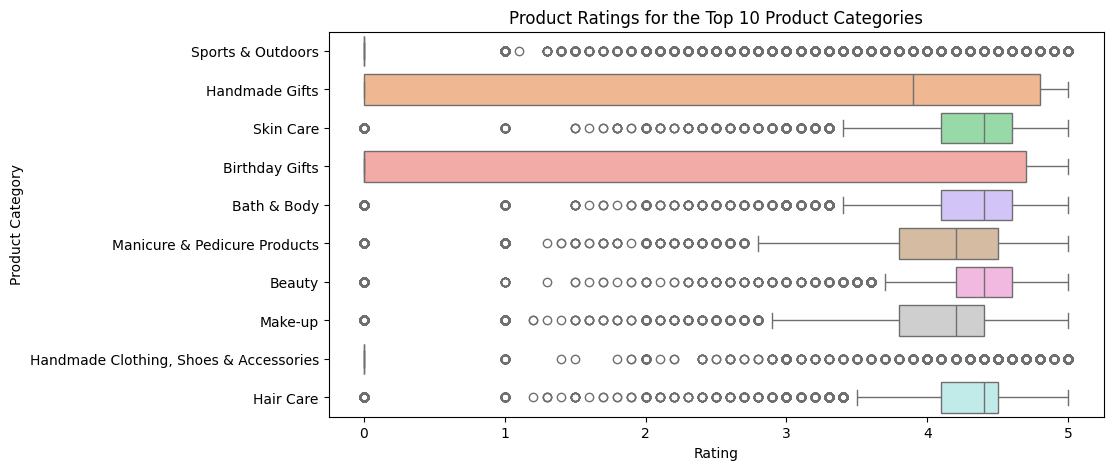

In [117]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_top_10, y='category', x='stars', palette="pastel")
plt.title("Product Ratings for the Top 10 Product Categories")
plt.xlabel("Rating")
plt.ylabel("Product Category")
plt.show()

In [120]:
median_rating = df.groupby('category')['stars'].median().sort_values(ascending=False)
median_rating

category
Computer Memory                                 4.7
CPUs                                            4.6
Building & Construction Toys                    4.6
Laptop Accessories                              4.6
Hobbies                                         4.6
                                               ... 
Synthesisers, Samplers & Digital Instruments    0.0
Tablets                                         0.0
Action Cameras                                  0.0
3D Printing & Scanning                          0.0
eBook Readers & Accessories                     0.0
Name: stars, Length: 296, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings


In [128]:
# Calculate the correlation coefficient between price and stars.
correlation = df_clean['price'].corr(df_clean['stars'])
print(f"The Pearson Correlation Coefficient is: {correlation}")

correlation_2 = df_clean['price'].corr(df_clean['stars'], method='spearman')
print(f"The Spearman Correlation Coefficient is: {correlation_2}")

The Pearson Correlation Coefficient is: -0.07767299878181444
The Spearman Correlation Coefficient is: -0.06679697280768455


In [ ]:
# The values above suggest a strong negative correlation between the two variables.

#### Visualizations:

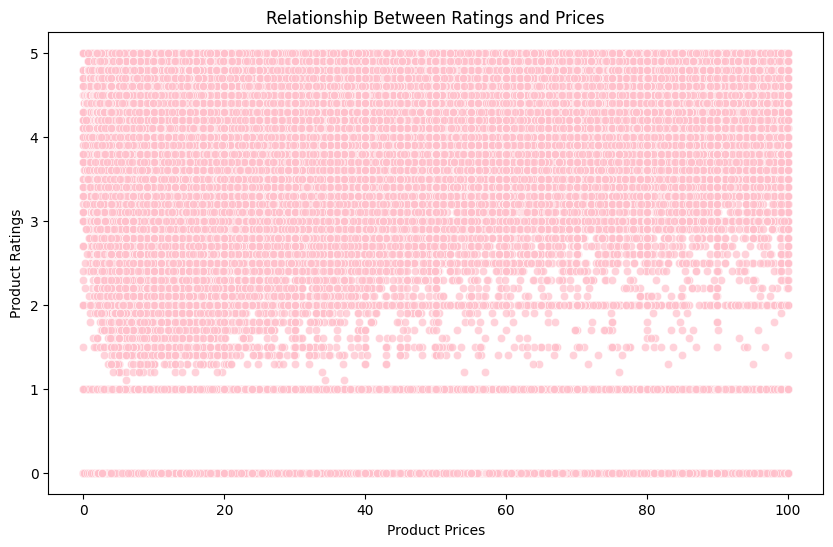

In [134]:
# Use a scatter plot to visualize the relationship between product rating and price.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='price', y='stars', alpha=0.7, color='pink')
plt.title("Relationship Between Ratings and Prices")
plt.xlabel("Product Prices")
plt.ylabel("Product Ratings")
plt.show()

In [135]:
# As we can observe the vast majority of the Product Ratings are focused around the higher ratings, this means that most of the Products present in this dataset have a good rating.
# There is more variability in terms of ratings for lower priced products and higher priced products tend to be more consistent

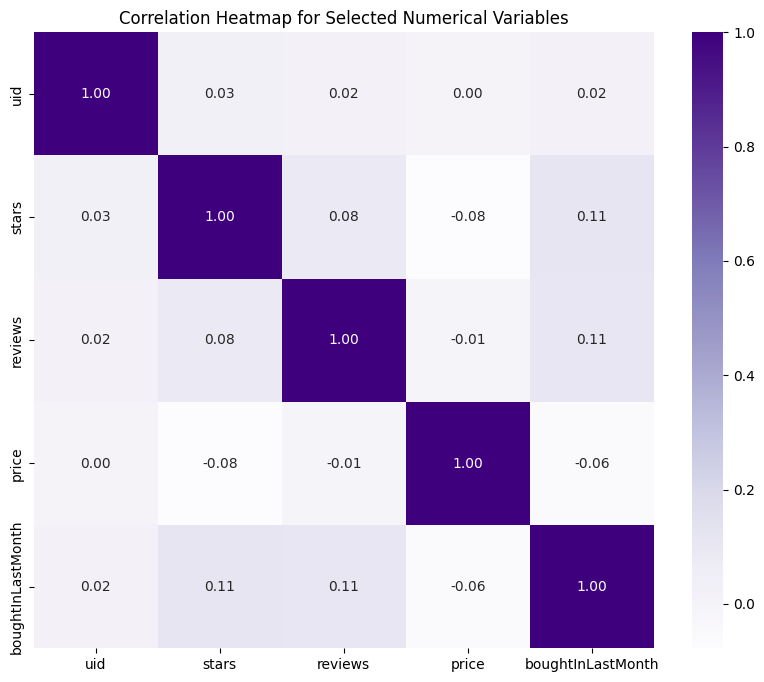

In [153]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
df_numerical = df_clean.select_dtypes(include=['number'])

correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt='.2f')
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [ ]:
import statsmodels.api as sm

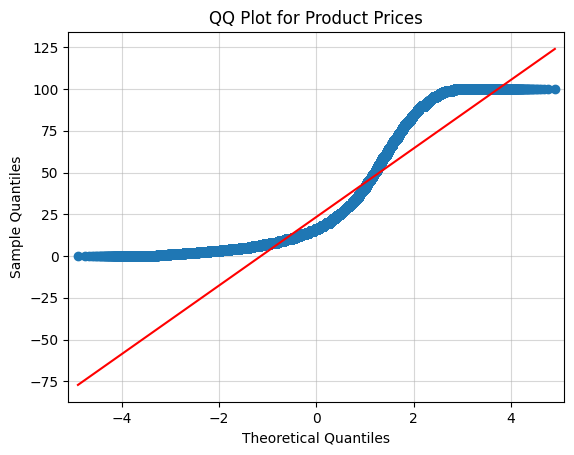

In [156]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
sm.qqplot(df_clean['price'], line='s')
plt.title('QQ Plot for Product Prices')
plt.grid(alpha=0.5)